In [80]:
import pandas as pd
import pandas_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

In [6]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follows:

total_bill: Total bill in dollars including taxes

tip: Tip given to waiters in dollars

sex: gender of the person paying the bill

smoker: whether the person smoked or not

day: day of the week

time: lunch or dinner

size: number of people in a table

In [55]:
tips_df = pd.read_excel('tips.xlsx')

In [8]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips_df.shape

(244, 7)

In [9]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tips_df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [15]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
pf.ProfileReport(tips_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
tips_df.groupby("day").agg({"tip": ["sum", "min", "max"]})

tip             
         sum   min    max
day                      
Fri    51.96  1.00   4.73
Sat   260.40  1.00  10.00
Sun   247.39  1.01   6.50
Thur  171.83  1.25   6.70

In [220]:
tips_df_pivot = tips_df.pivot_table(index = 'day', columns ='time', values = 'tip');
tips_df_pivot

time,0,1
day,,
0,2.780500,3.000000
1,2.382857,2.940000
2,NaN,2.783571
3,NaN,3.255132


In [23]:
tips_df_pivot_2 = tips_df.pivot_table(index = 'day', columns ='sex', values = 'tip');
tips_df_pivot_2

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


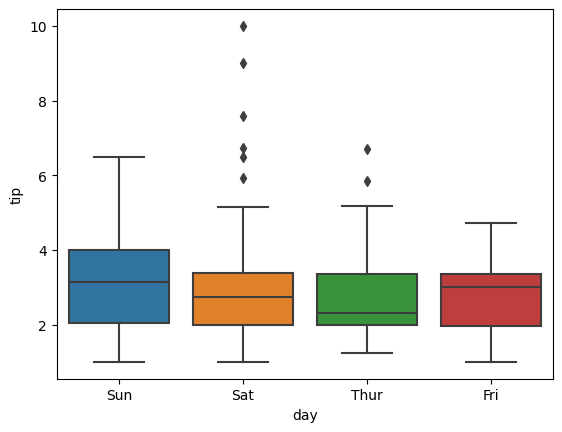

In [26]:
sns.boxplot( x= 'day', y= 'tip', data = tips_df);

In [56]:
tips_df['tip'].mean()

2.99827868852459

In [57]:
#Remove Outliers
tips_df = tips_df[tips_df['tip']<=7] #bazuar edhe tek Pandas Profiling

In [58]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [59]:
tips_df['tip'].mean()

2.925311203319502

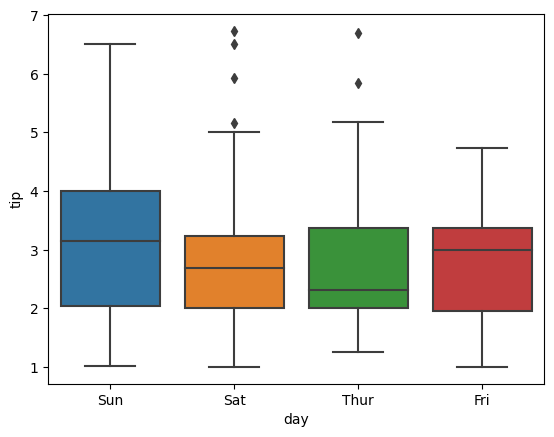

In [60]:
sns.boxplot( x= 'day', y= 'tip', data = tips_df);

In [62]:
tips_df['avg_bill_per_person'] = tips_df['total_bill']/tips_df['size']

In [63]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,avg_bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


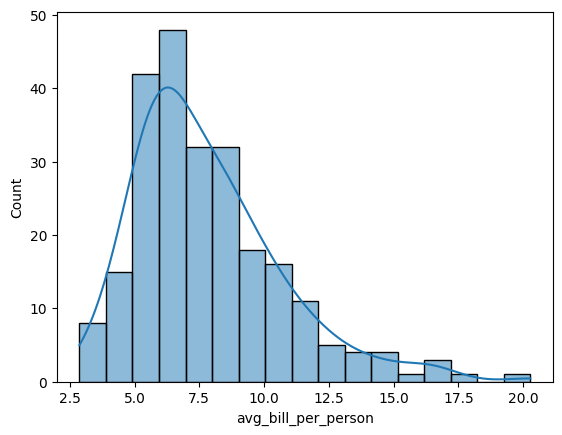

In [68]:
sns.histplot(x= 'avg_bill_per_person', data = tips_df, kde=True);

In [73]:
#Removing Boolean Data
tips_df.drop(["smoker"], axis=1, inplace=True)



In [74]:
tips_df

,total_bill,tip,sex,day,time,size,avg_bill_per_person
0,16.99,1.01,Female,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,Sat,Dinner,2,8.910000


In [75]:
#Removing Dublicated Data

tips_df.drop_duplicates(inplace=True)

In [76]:
tips_df

,total_bill,tip,sex,day,time,size,avg_bill_per_person
0,16.99,1.01,Female,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,Sat,Dinner,2,8.910000


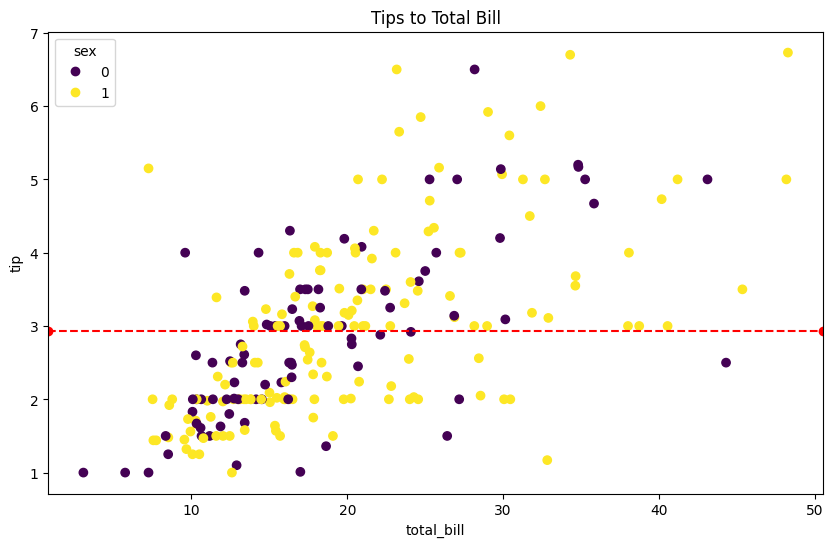

In [218]:
#Create the Plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot the data 

scatter_plot = ax.scatter(tips_df['total_bill'], tips_df['tip'], c=tips_df['sex'])

#Customize the Plot

ax.set(title='Tips to Total Bill', xlabel='total_bill', ylabel='tip');
ax.legend(*scatter_plot.legend_elements(), title = "sex");

#What if we wanted a horizontal line going across with the mean 

ax.axhline(tips_df['tip'].mean(), linestyle = '--', color='r', marker ='o');



In [78]:
#Converting Categorical Data to Integer for the Model

tips_df['sex']=tips_df["sex"].map({"Female": 0, "Male":1})

tips_df['day']=tips_df["day"].map({"Thur": 0, "Fri":1, "Sat":2, "Sun":3 })

tips_df['time']=tips_df["time"].map({"Lunch": 0, "Dinner":1})


In [79]:
tips_df

,total_bill,tip,sex,day,time,size,avg_bill_per_person
0,16.99,1.01,0,3,1,2,8.495000
1,10.34,1.66,1,3,1,3,3.446667
2,21.01,3.50,1,3,1,3,7.003333
3,23.68,3.31,1,3,1,2,11.840000
4,24.59,3.61,0,3,1,4,6.147500
...,...,...,...,...,...,...,...
239,29.03,5.92,1,2,1,3,9.676667
240,27.18,2.00,0,2,1,2,13.590000
241,22.67,2.00,1,2,1,2,11.335000
242,17.82,1.75,1,2,1,2,8.910000


##Linear Regression

In [224]:
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'day', 'time', 'size',
       'avg_bill_per_person'],
      dtype='object')

In [241]:
#Set up the dependent and the independent variables

X = tips_df[['total_bill']] #marrim vtm total_bill si features

y = tips_df['tip'] # marrim y kolonen e fundit

In [242]:
print(X)
print(y)

     total_bill
0         16.99
1         10.34
2         21.01
3         23.68
4         24.59
..          ...
239       29.03
240       27.18
241       22.67
242       17.82
243       18.78

[240 rows x 1 columns]
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 240, dtype: float64


/Users/besartazeneli/opt/anaconda3/envs/data_visualization/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


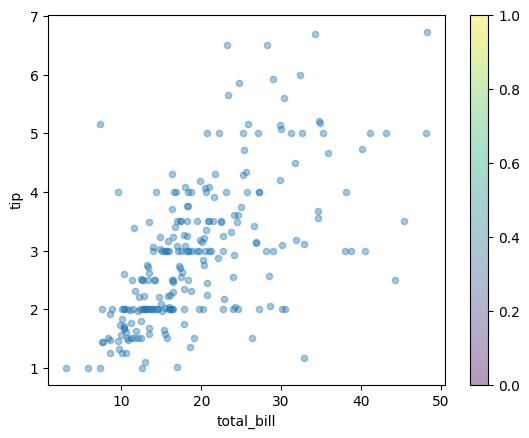

In [243]:
tips_df.plot(x='total_bill',y='tip', kind ='scatter', alpha=0.4,colorbar=True,cmap=plt.get_cmap("jet"));

In [244]:
#Divide the data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [245]:
#Have a glance at the shape of the train and test sets:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 1) (240,)
(216, 1) (216,)
(24, 1) (24,)


In [246]:
#Train the algorithm:

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [247]:
#Having a look at the coefficients that the model has chosen:

print(model_lin.intercept_)
print(model_lin.coef_)

1.123054191170174
[0.0923449]


In [248]:
X_test.head()

,total_bill
25,17.81
6,8.77
94,22.75
110,14.00
105,15.36


In [249]:
#Prediction for X_test

Y_predict = model_lin.predict(X_test)

In [250]:
Y_predict

array([2.76771684, 1.93291895, 3.22390064, 2.41588277, 2.54147184,
       2.67629539, 4.15473722, 2.81111894, 2.48791179, 2.64028088,
       3.17588129, 2.3013751 , 2.72154439, 2.10468046, 3.49724154,
       2.55717047, 3.93587981, 3.11585711, 3.39012145, 1.90983273,
       2.17393914, 3.02997635, 3.8038266 , 2.81758308])

In [251]:
y_test

25     2.34
6      2.00
94     3.25
110    3.00
105    1.64
174    4.00
237    1.17
87     4.00
9      3.23
144    2.30
46     5.00
209    2.23
115    3.50
169    2.00
114    4.00
234    3.00
187    2.00
15     3.92
153    2.00
126    1.48
128    2.00
19     3.35
239    5.92
31     2.50
Name: tip, dtype: float64

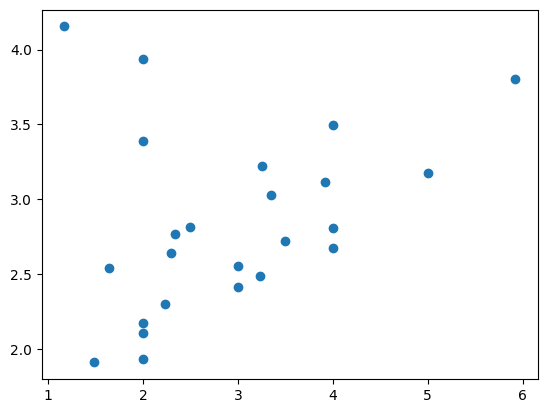

In [262]:
plt.scatter(y_test,Y_predict);


/var/folders/s8/q4h5prcn1q5bl45_39p1qzjm0000gp/T/ipykernel_2123/927613618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - Y_predict));


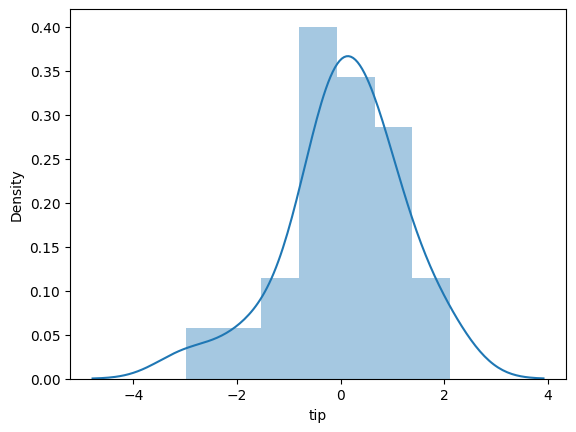

In [253]:
sns.distplot((y_test - Y_predict));

In [254]:
#MSE
mean_squared_error(y_test, Y_predict)

1.2376770503595822

In [255]:
#MAE
mean_absolute_error(y_test, Y_predict)

0.8249205131291794

In [256]:
r2_score(y_test, Y_predict)

0.039999056016795875

##Polinomial Model

In [175]:
#Set up the dependent and the independent variables

X = tips_df[['total_bill']] #marrim kolonen si features

y = tips_df['tip'] # marrim y kolonen e fundit

In [176]:
#Divide the data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [181]:
model_poly = LinearRegression()
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
model_poly.fit(X_poly, y_train)

LinearRegression()

In [182]:
print(model_poly.intercept_)
print(model_poly.coef_)

0.20216040424563575
[ 0.          0.18386106 -0.00190386]


In [184]:
X_test_transform = poly.transform(X_test)

In [185]:
Y_predict_poly = model_poly.predict(X_test_transform)

In [186]:
Y_predict_poly

array([2.87282966, 1.66819067, 3.39963421, 2.40305913, 2.5770899 ,
       2.75607849, 4.18632439, 2.92695055, 2.5037322 , 2.70906095,
       3.34855693, 2.23824598, 2.81433087, 1.94147344, 3.67077059,
       2.59834855, 4.03614716, 3.28326244, 3.56848969, 1.63045483,
       2.0479413 , 3.18704356, 3.93518834, 2.93493915])

In [187]:
y_test

25     2.34
6      2.00
94     3.25
110    3.00
105    1.64
174    4.00
237    1.17
87     4.00
9      3.23
144    2.30
46     5.00
209    2.23
115    3.50
169    2.00
114    4.00
234    3.00
187    2.00
15     3.92
153    2.00
126    1.48
128    2.00
19     3.35
239    5.92
31     2.50
Name: tip, dtype: float64

In [189]:
#MSE
mean_squared_error(y_test, Y_predict_poly)

1.2002041823531344

In [188]:
#MAE
mean_absolute_error(y_test, Y_predict_poly)

0.7989238115552268

In [190]:
r2_score(y_test, Y_predict_poly)

0.0690647873798329

##Decision Tree Model

In [191]:
X = tips_df[['total_bill']] #marrim kolonen si features

y = tips_df['tip'] # marrim y kolonen e fundit

/Users/besartazeneli/opt/anaconda3/envs/data_visualization/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


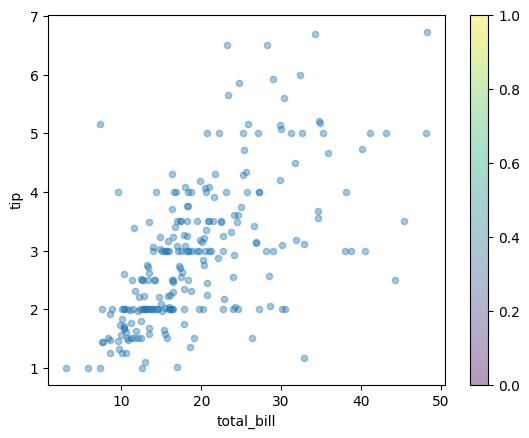

In [192]:
tips_df.plot(x='total_bill',y='tip', kind ='scatter', alpha=0.4,colorbar=True,cmap=plt.get_cmap("jet"));

In [193]:
#Divide the data into train and test sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [194]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(216, 1)
(24, 1)
(216,)
(24,)


In [195]:
model_DT = DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [196]:
model_DT.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [197]:
y_pred = model_DT.predict(X_test)

In [198]:
y_pred

array([2.91617021, 1.87461538, 3.315     , 2.37567568, 2.37567568,
       2.91617021, 4.37875   , 2.91617021, 2.37567568, 2.91617021,
       3.315     , 1.87461538, 2.91617021, 1.87461538, 3.76472222,
       2.37567568, 4.37875   , 3.315     , 3.76472222, 1.87461538,
       1.87461538, 3.315     , 3.76472222, 2.91617021])

In [199]:
y_test

25     2.34
6      2.00
94     3.25
110    3.00
105    1.64
174    4.00
237    1.17
87     4.00
9      3.23
144    2.30
46     5.00
209    2.23
115    3.50
169    2.00
114    4.00
234    3.00
187    2.00
15     3.92
153    2.00
126    1.48
128    2.00
19     3.35
239    5.92
31     2.50
Name: tip, dtype: float64

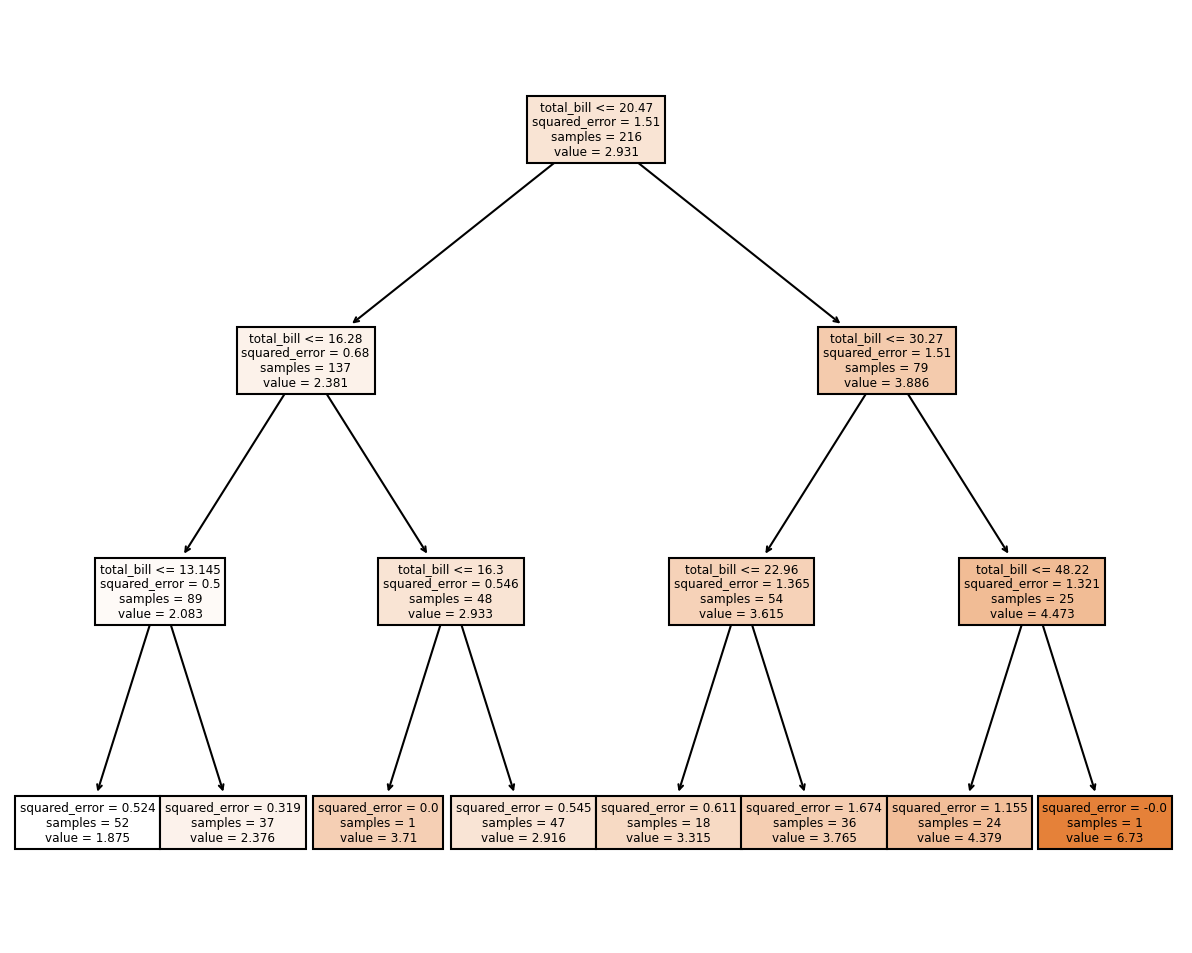

In [221]:
plt.figure(figsize=(10,8), dpi=150);
tree.plot_tree(model_DT,filled=True,feature_names=tips_df.columns);

In [201]:
#MAE
mean_absolute_error(y_test, y_pred)

0.8523991780241782

In [202]:
#MSE
mean_squared_error(y_test, y_pred)

1.3722896338533872

In [203]:
r2_score(y_test, y_pred)

-0.06441283979118273